<a href="https://colab.research.google.com/github/AYA-ELMAZHARI/AndroidCamera2API/blob/master/DGA_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression Classifier in Python - Basic Introduction



In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$p =1 / 1 + e^{-y}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely. 
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables. 
* Vulnerable to overfitting. 


#### Data
Is the url DGA?  Let's find out because...

In [3]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [6]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving urls.csv to urls (1).csv
User uploaded file "urls.csv" with length 77885740 bytes


In [7]:
# Explore data

df_dga = pd.read_csv('dgas.csv', sep= "\t")
df_dga= df_dga[['longueur_sld','longueur_tld','nombre_domaine','ic','shanon_indice','moyenne', 'syllabe','digits','classe']] 	
df_dga=df_dga.sample(frac=1).reset_index(drop=True)
df_dga.head()

,longueur_sld,longueur_tld,nombre_domaine,ic,shanon_indice,moyenne,syllabe,digits,classe
0,20,3,0,0.031579,2.622996,0.200000,4,3,1
1,15,2,0,0.019048,2.523211,0.266667,4,3,1
2,9,2,0,0.055556,1.889159,0.222222,2,0,1
3,10,4,0,0.044444,1.886697,0.100000,1,2,1
4,10,2,0,0.066667,1.886697,0.300000,3,0,1


In [15]:
df_url = pd.read_csv('urls.csv', sep= "\t")
df_url = df_url[['longueur_sld','longueur_tld','nombre_domaine','ic','shanon_indice','moyenne', 'syllabe','digits','classe']] 	
df_url=df_url.sample(frac=1).reset_index(drop=True)
df_url.head()

,longueur_sld,longueur_tld,nombre_domaine,ic,shanon_indice,moyenne,syllabe,digits,classe
0,10,3,0,0.066667,1.973001,0.400000,4,0,0
1,9,3,0,0.083333,1.831020,0.333333,3,0,0
2,8,3,0,0.071429,1.732868,0.375000,3,0,0
3,8,3,0,0.107143,1.667462,0.250000,2,2,0
4,10,3,0,0.022222,2.163956,0.400000,4,0,0


In [16]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet_url, testSet_url = train_test_split(df_url, test_size=0.2)

In [17]:
# Split data into train test sets

trainingSet_dga, testSet_dga = train_test_split(df_dga, test_size=0.2)

In [18]:
# Creating the dataframes for training and test datasets
train_df = trainingSet_url.append(trainingSet_dga)
train_df=train_df.sample(frac=1).reset_index(drop=True)
test_df = testSet_url.append(testSet_dga)
test_df=test_df.sample(frac=1).reset_index(drop=True)
#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [19]:
df_tr = train_df.sample(frac=1).reset_index(drop=True)
df_tr.head()

,longueur_sld,longueur_tld,nombre_domaine,ic,shanon_indice,moyenne,syllabe,digits,classe
0,13,3,0,0.012821,2.458311,0.230769,3,0,0
1,11,2,0,0.054545,2.019815,0.363636,4,0,0
2,19,2,0,0.017544,2.725550,0.315789,6,4,1
3,13,3,0,0.064103,2.098147,0.384615,5,0,0
4,10,4,0,0.000000,2.302585,0.100000,1,2,1


In [20]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['longueur_sld','longueur_tld','nombre_domaine','ic','shanon_indice','moyenne','digits', 'syllabe']] 	

y_train = train_df["classe"]

X_test = test_df[['longueur_sld','longueur_tld','nombre_domaine','ic','shanon_indice','moyenne','digits', 'syllabe']] 	

y_test = test_df["classe"]



In [21]:

y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: classe, dtype: int64

### Data Exploration

In [22]:
y_train.value_counts()

0    800000
1    411141
Name: classe, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


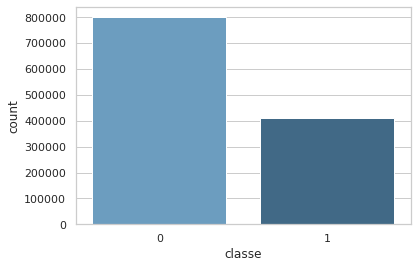

<Figure size 432x288 with 0 Axes>

In [23]:
sns.countplot("classe", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [24]:
count_no_choc = len(train_df[train_df['classe']==0])
count_choc = len(train_df[train_df['classe']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no dga is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of dga", pct_of_choc*100)


percentage of no dga is 66.05341574597838
percentage of dga 33.94658425402162


In [25]:
train_df.groupby('classe').mean()

,longueur_sld,longueur_tld,nombre_domaine,ic,shanon_indice,moyenne,syllabe,digits
classe,,,,,,,,
0,10.900516,2.651806,0.142704,0.049999,1.961640,0.384075,4.148729,0.148987
1,15.106066,2.631270,0.000112,0.027321,2.410819,0.194623,2.932629,2.402828


In [26]:
train_df.groupby('ic').mean()

,longueur_sld,longueur_tld,nombre_domaine,shanon_indice,moyenne,syllabe,digits,classe
ic,,,,,,,,
0.000000,7.329676,2.599924,0.062311,1.878345,0.298218,2.072144,0.790923,0.213074
0.002646,28.000000,3.000000,0.000000,2.995294,0.107143,3.000000,11.000000,1.000000
0.002849,27.333333,3.000000,0.000000,2.895143,0.092593,2.500000,12.166667,0.833333
0.003077,26.166667,3.000000,0.000000,2.820142,0.096154,2.500000,13.083333,0.916667
0.003166,69.000000,3.000000,1.000000,2.810257,0.089552,6.000000,50.000000,0.000000
...,...,...,...,...,...,...,...,...
0.750000,8.000000,3.000000,0.000000,0.376770,0.875000,7.000000,1.000000,0.000000
0.800000,10.000000,3.000000,0.000000,0.325083,0.900000,9.000000,0.000000,0.000000
0.875000,16.000000,3.000000,0.000000,0.233792,0.937500,15.000000,0.000000,0.000000


### Model Development and Prediction
Import the Scikit Learn Logistic Regression module 
Fit model on the train set using fit() then perform prediction on test set using prediction

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[194496,   5504],
       [ 10959,  91827]])

### Visualize CFM (confusion matrix) using a heatmap

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

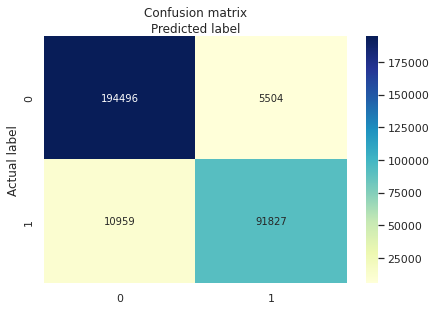

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9456282655076522
Precision: 0.9434506991605963
Recall: 0.8933804214581752


### ROC (Receiver Operation Characteristic) Curve
Plotting true positive rate against false positie rate. Shows tradeoff between sensitivity and specificity. 

### What is AUC - ROC Curve? (credit https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#### AUC - ROC curve 
Is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

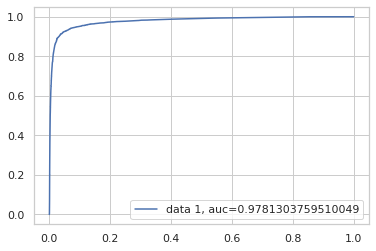

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
import pickle

In [34]:
filename = 'finalized_model2.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open("finalized_model2.sav", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9456282655076522
